Accuracy with Euclidean distance: 0.5846153846153846
Accuracy with Manhattan distance: 0.6307692307692307


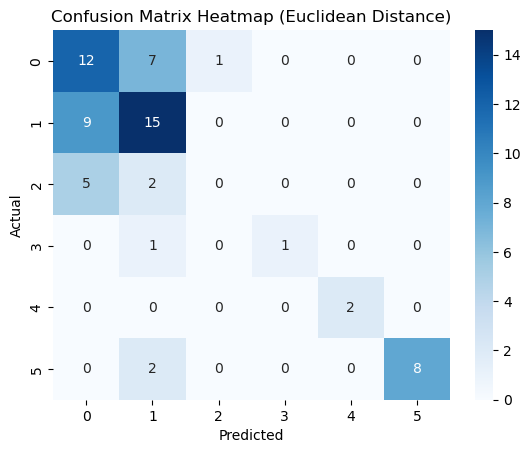

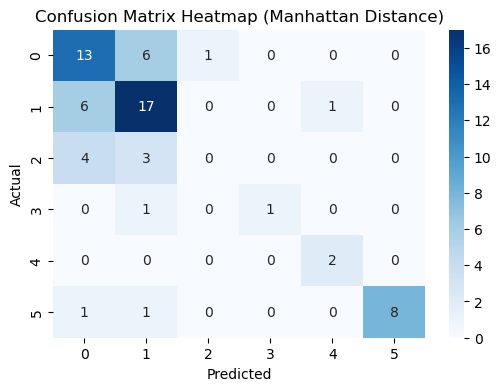

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

df = pd.read_csv('glass.csv')

imputer = SimpleImputer(strategy='median')
df[df.columns] = imputer.fit_transform(df[df.columns])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('Type', axis=1))

X = X_scaled
y = df['Type'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Using scikit-learn with Euclidean distance
clf_euclidean = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
clf_euclidean.fit(X_train, y_train)
predictions_euclidean = clf_euclidean.predict(X_test)
accuracy_euclidean = accuracy_score(y_test, predictions_euclidean)
print("Accuracy with Euclidean distance:", accuracy_euclidean)

# Using scikit-learn with Manhattan distance
clf_manhattan = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
clf_manhattan.fit(X_train, y_train)
predictions_manhattan = clf_manhattan.predict(X_test)
accuracy_manhattan = accuracy_score(y_test, predictions_manhattan)
print("Accuracy with Manhattan distance:", accuracy_manhattan)

cm_euclidean = confusion_matrix(y_test, predictions_euclidean)
cm_manhattan = confusion_matrix(y_test, predictions_manhattan)

# Plotting the confusion matrix for Custom Euclidean distance
# plt.figure(figsize=(6, 4))
sns.heatmap(cm_euclidean, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap (Euclidean Distance)')
plt.show()

# Plotting the confusion matrix for Custom Manhattan distance
plt.figure(figsize=(6, 4))
sns.heatmap(cm_manhattan, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap (Manhattan Distance)')
plt.show()